In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

In [2]:

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'gdc'
cols = ['identificacion', 'ddd', 'dddstd', 'dddx', 'fhora', 'hr', 'lluv', 'pres', 'temp', 'ts', 'vel', 'velx']
date_time = 'fhora'

df = pd.read_csv(f'data_{station}/{station}_output.csv')
df_copy = df[cols]
df_copy[date_time] = pd.to_datetime(df_copy[date_time])
df_copy = df_copy.sort_values(date_time)


df_copy = df_copy.drop_duplicates(subset=[date_time], keep='first')



C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_20196\2448523446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[date_time] = pd.to_datetime(df_copy[date_time])


In [8]:
num_cols = len(df_copy.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df_copy.columns.drop('fhora')):
    ax.plot(df_copy['fhora'], df_copy[col])
    ax.set_xlabel('fhora')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [3]:
df_copy.tail()

,identificacion,ddd,dddstd,dddx,fhora,hr,lluv,pres,temp,ts,vel,velx
945916,89070,229,13,238,2024-03-23 23:10:00+00:00,82,0.0,991.6,0.5,-0.3,6.4,9.5
945917,89070,225,15,222,2024-03-23 23:20:00+00:00,82,0.0,991.9,0.3,-0.4,5.4,8.0
945918,89070,220,12,214,2024-03-23 23:30:00+00:00,82,0.0,991.9,0.3,-0.4,7.2,10.4
945919,89070,234,12,235,2024-03-23 23:40:00+00:00,82,0.0,991.7,0.4,-0.4,8.1,11.0
945920,89070,232,15,248,2024-03-23 23:50:00+00:00,83,0.0,991.8,0.4,-0.4,7.6,12.3


In [4]:
df_horapunto = df_copy[df_copy[date_time].dt.minute == 0]
df_horapunto = df_horapunto.reset_index(drop=True)
df_horapunto.head(10)

,identificacion,ddd,dddstd,dddx,fhora,hr,lluv,pres,temp,ts,vel,velx
0,89070,346,0,0,2006-01-02 00:00:00+00:00,0,0.0,1005.2,NaN,1.8,9.2,13.8
1,89070,335,0,0,2006-01-02 01:00:00+00:00,0,0.0,1005.4,NaN,1.7,8.3,15.2
2,89070,344,0,0,2006-01-02 02:00:00+00:00,0,0.0,1005.6,NaN,1.7,8.7,13.8
3,89070,341,0,0,2006-01-02 03:00:00+00:00,0,0.0,1005.8,NaN,1.7,7.4,12.4
4,89070,345,0,0,2006-01-02 04:00:00+00:00,0,0.0,1006.1,NaN,1.6,5.8,10.1
5,89070,1,0,0,2006-01-02 05:00:00+00:00,0,0.0,1006.2,NaN,1.7,6.2,8.9
6,89070,6,0,0,2006-01-02 06:00:00+00:00,0,0.0,1006.2,NaN,2.1,5.4,8.7
7,89070,9,0,0,2006-01-02 07:00:00+00:00,0,0.0,1006.2,NaN,2.8,7.2,12.0
8,89070,3,0,0,2006-01-02 08:00:00+00:00,0,0.0,1006.2,NaN,2.9,7.0,10.1
9,89070,2,0,0,2006-01-02 09:00:00+00:00,0,0.0,1006.4,NaN,3.4,5.8,8.4


### Pasos opcionales

Dependiendo de dataset será necesario:
-Acumular la lluvia por horas.
-Inspeccionar y encontrar anomalías (por ejemplo, en las bases de españa han apuntado nulos como 0)

In [6]:

#! Cambiar los valores de ddd,dddstd, dddx y hr. Si es 0, Nan

df_horapunto['hr'] = df_horapunto['hr'].replace(0, np.nan)
df_horapunto['ddd'] = df_horapunto['ddd'].replace(0, np.nan)
df_horapunto['dddx'] = df_horapunto['dddx'].replace(0, np.nan)
df_horapunto['dddstd'] = df_horapunto['dddstd'].replace(0, np.nan)

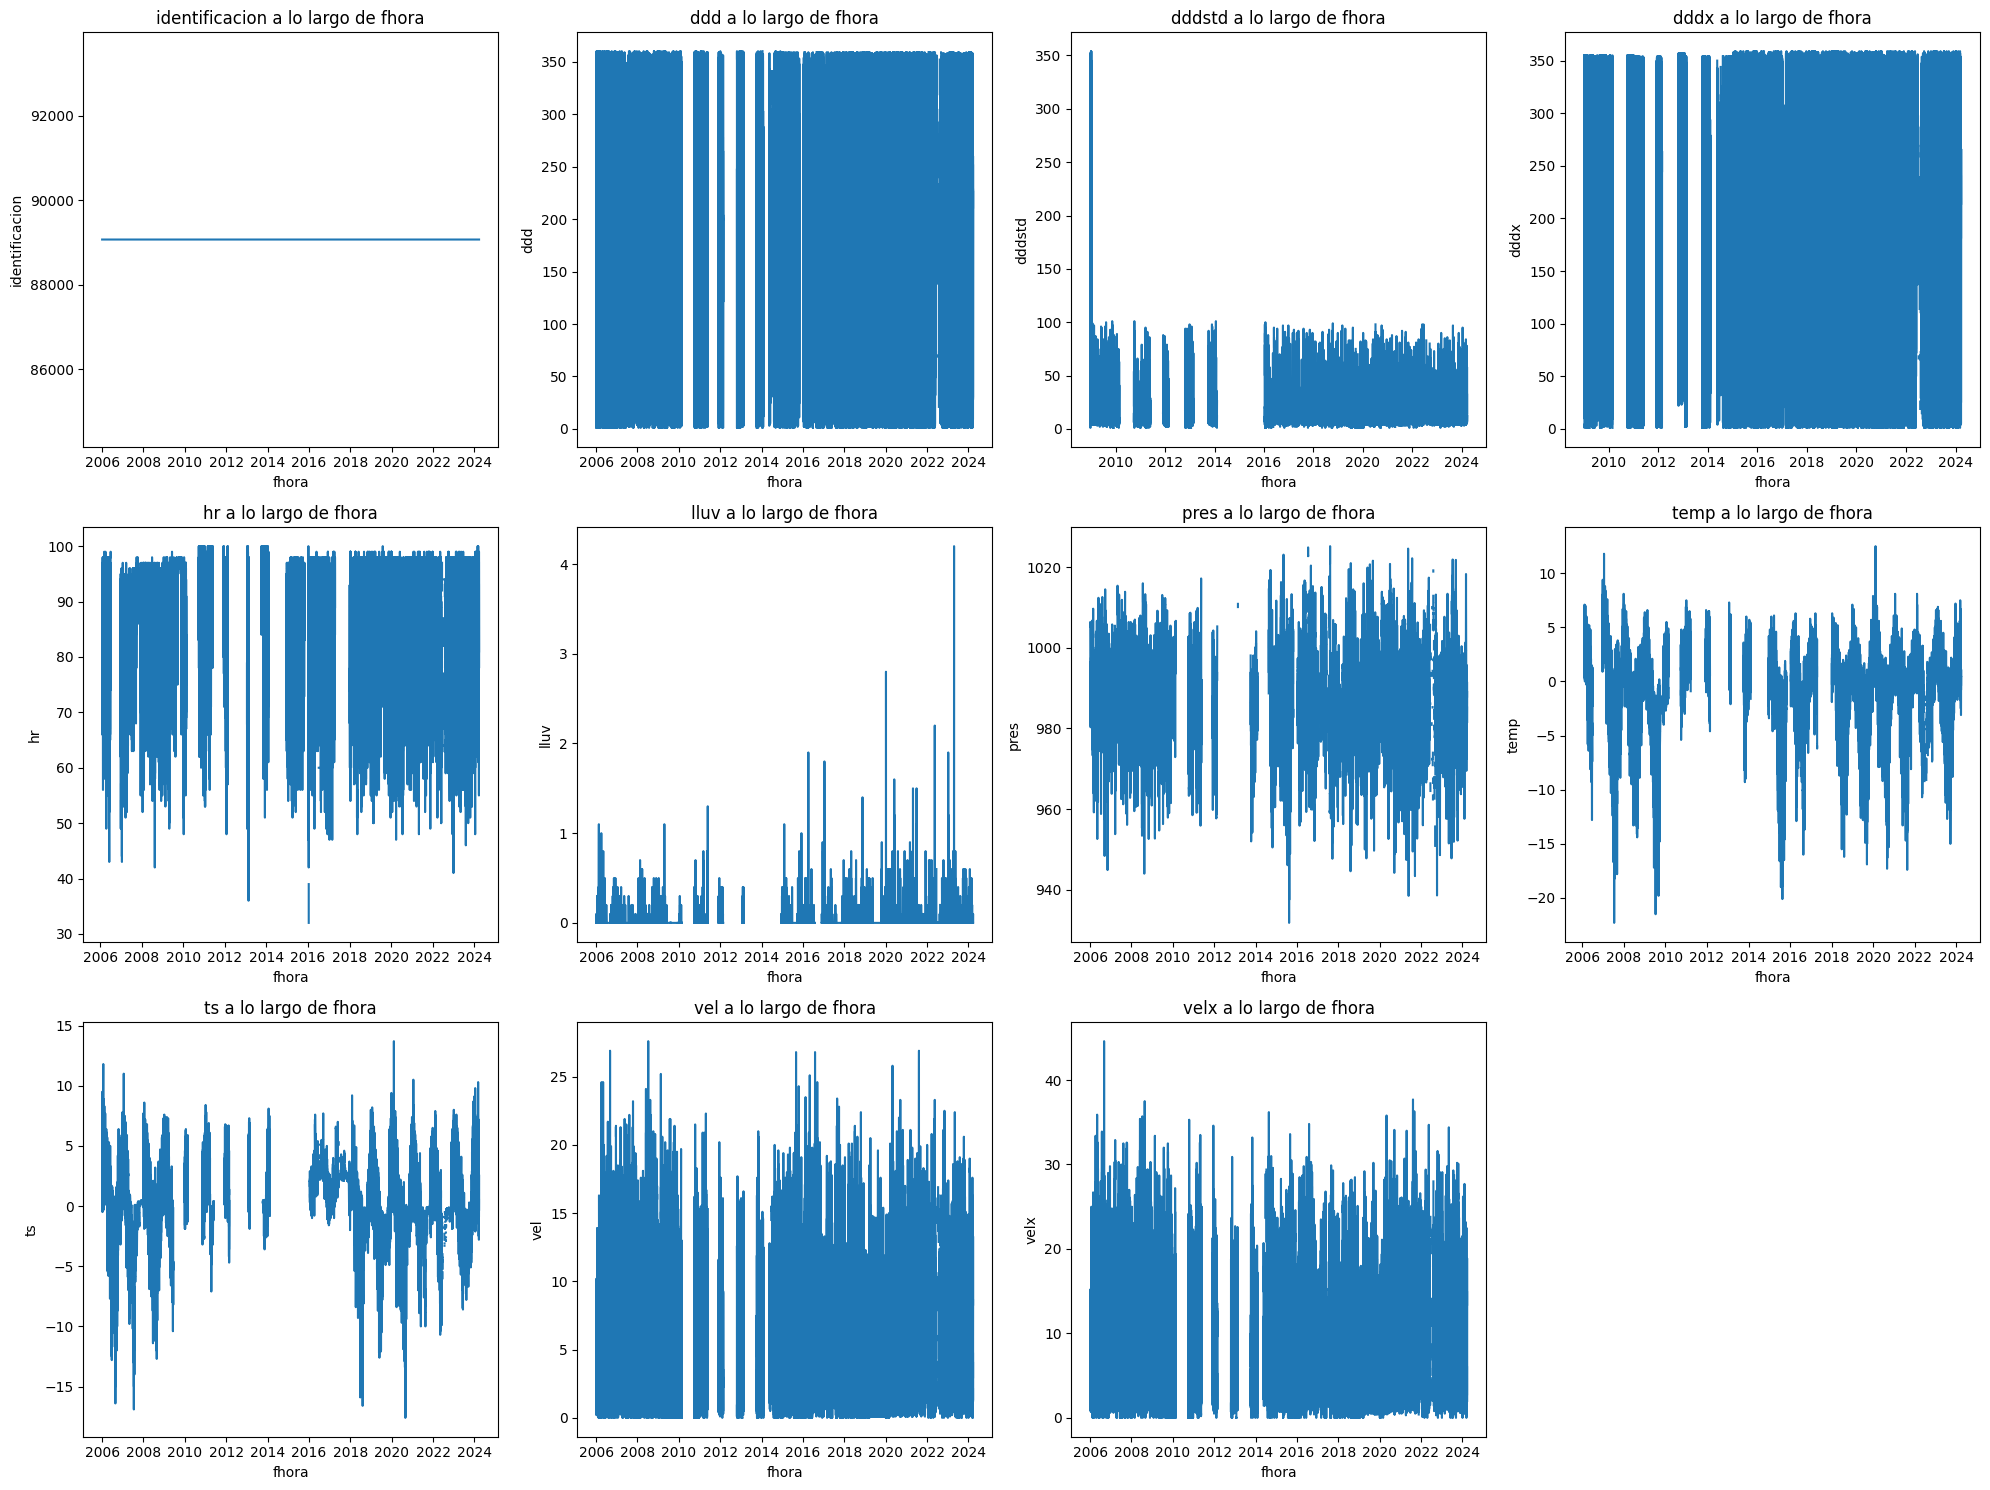

In [7]:



num_cols = len(df_horapunto.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df_horapunto.columns.drop('fhora')):
    ax.plot(df_horapunto['fhora'], df_horapunto[col])
    ax.set_xlabel('fhora')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [31]:
first_year = df_horapunto[date_time].dt.year.iloc[0]
last_year = df_horapunto[date_time].dt.year.iloc[-1]
df_horapunto.to_csv(f'data_{station}/{station}_{first_year}_{last_year}_hours_output.csv')

In [34]:

df_horapunto.head()

,identificacion,ddd,dddstd,dddx,fhora,hr,lluv,pres,temp,ts,vel,velx,qdato
0,89070,346,0,0,2006-01-02 00:00:00+00:00,0,0.0,1005.2,NaN,1.8,9.2,13.8,0
1,89070,335,0,0,2006-01-02 01:00:00+00:00,0,0.0,1005.4,NaN,1.7,8.3,15.2,0
2,89070,344,0,0,2006-01-02 02:00:00+00:00,0,0.0,1005.6,NaN,1.7,8.7,13.8,0
3,89070,341,0,0,2006-01-02 03:00:00+00:00,0,0.0,1005.8,NaN,1.7,7.4,12.4,0
4,89070,345,0,0,2006-01-02 04:00:00+00:00,0,0.0,1006.1,NaN,1.6,5.8,10.1,0


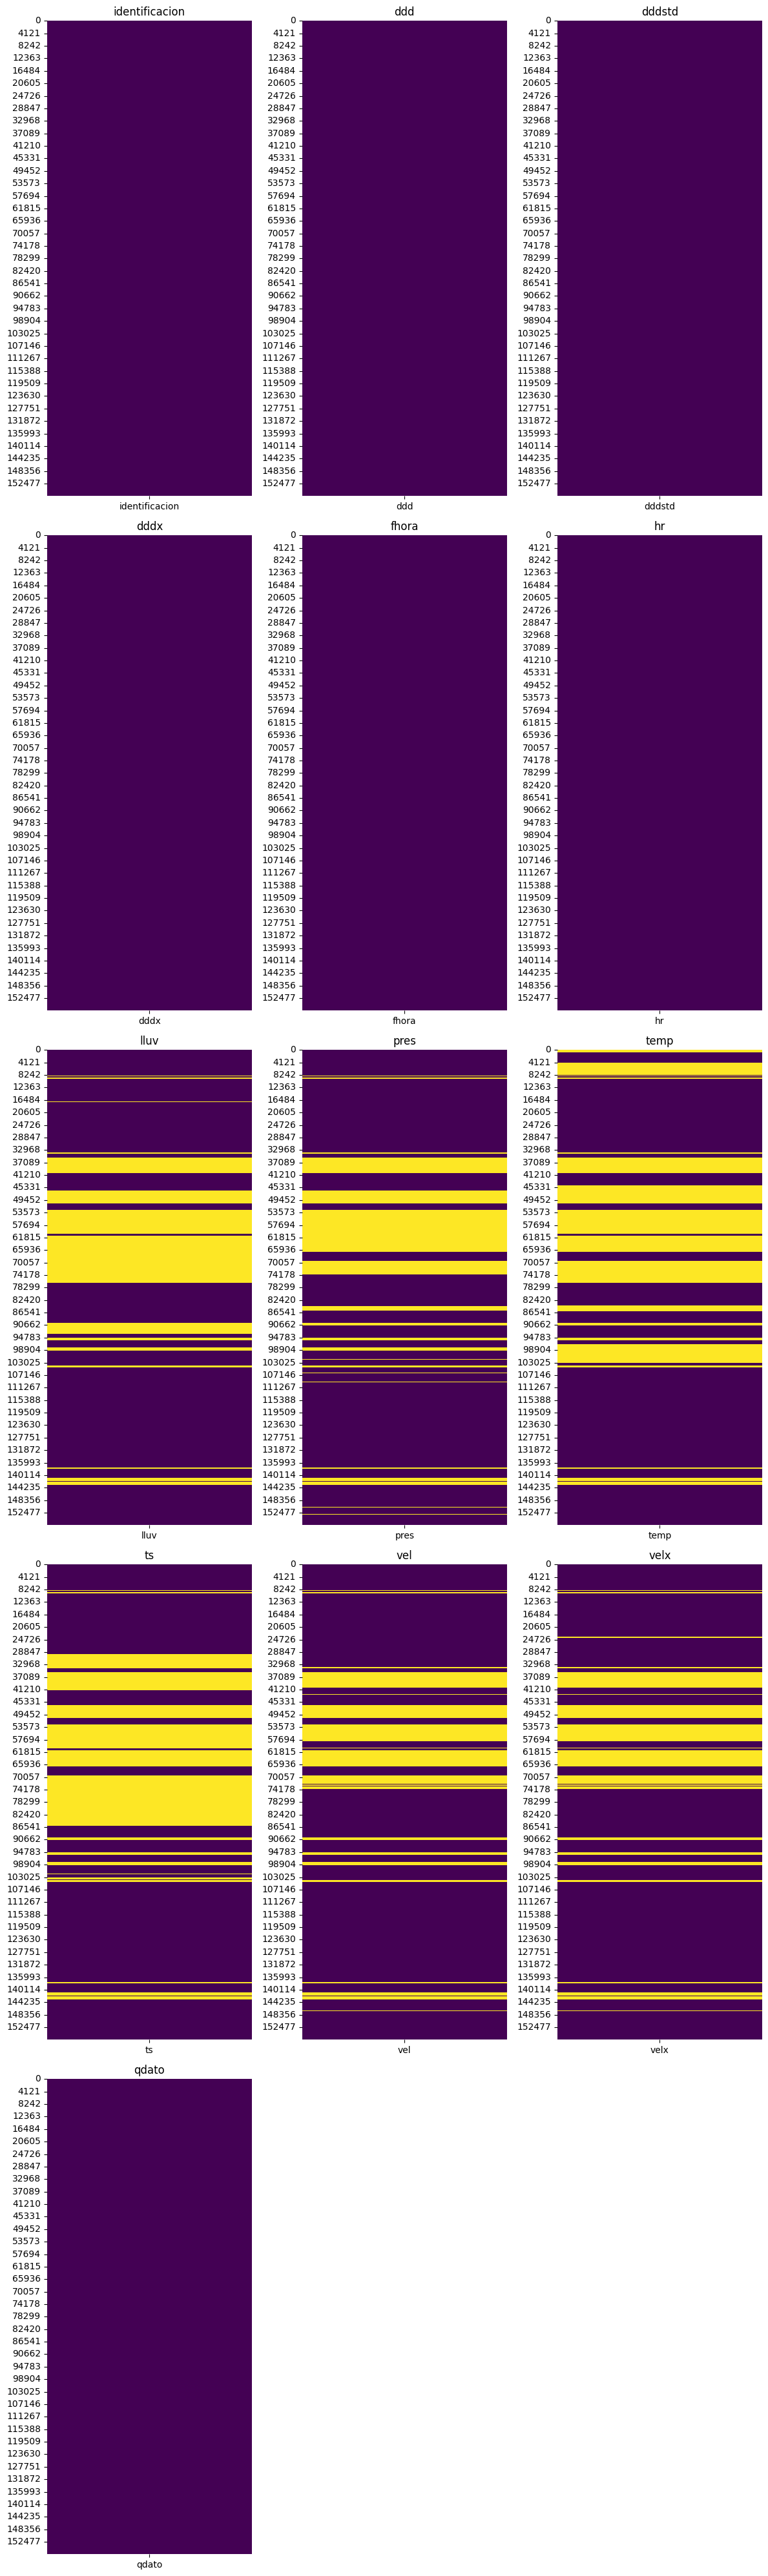

In [33]:
import math

num_cols = len(df_horapunto.columns)
num_rows = math.ceil(num_cols / 3)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 8 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas y generar gráficos
for ax, col in zip(axes, df_horapunto.columns):
    sns.heatmap(df_horapunto[[col]].isnull(), cbar=False, cmap='viridis', ax=ax)
    ax.set_title(col)

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 3
if num_cols % 3:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

## Remuestreo para hacer una media diaria

A partir de aquí no es necesario seguir revisando el código. Lo importante está arriba.

In [22]:
df_horapunto_resample = df_horapunto.resample('D').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(df_horapunto_resample[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

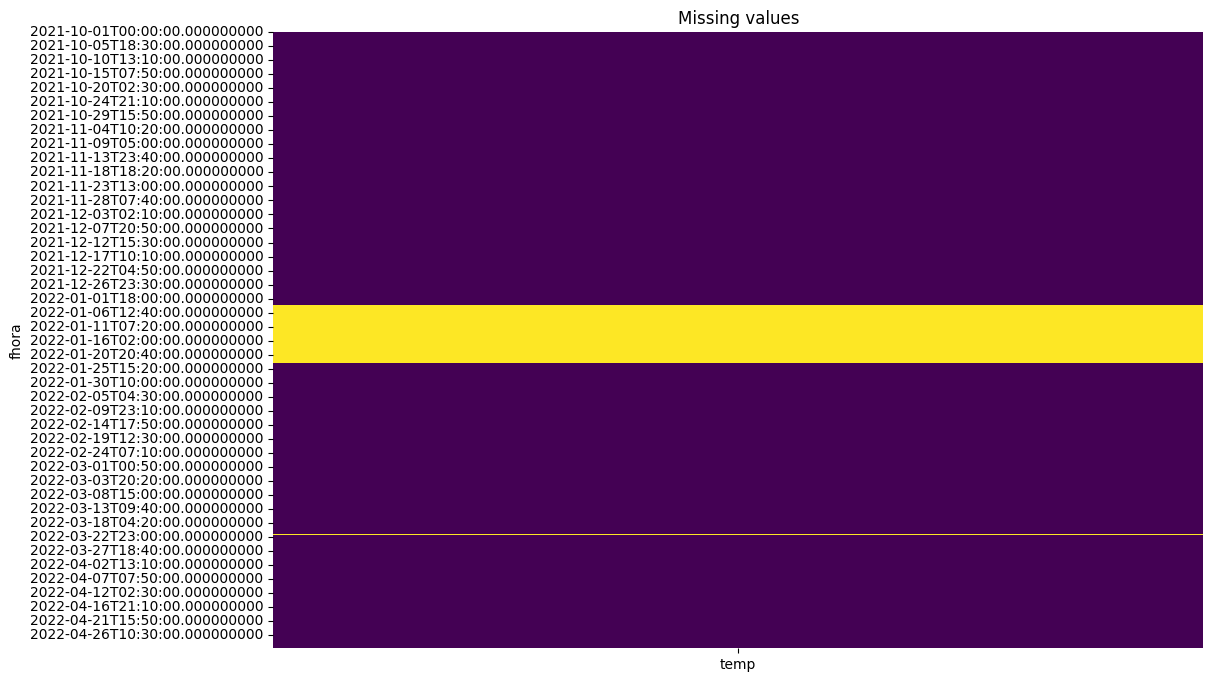

In [ ]:
df_periodo = df_copy[['temp']].loc['2021-10-01':'2022-04-30']

plt.figure(figsize=(12, 8))
sns.heatmap(df_periodo[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

In [ ]:
df_acumulate = df_horapunto.resample('H').sum()
df_horapunto['lluvAcumulada'] = df_acumulate['lluv']
df_periodo = df_horapunto['2021-02-01':'2024-06-30']

df_periodo[['lluvAcumulada', 'lluv']].head(30)

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\2453312111.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_acumulate = df_horapunto.resample('H').sum()
C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\2453312111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horapunto['lluvAcumulada'] = df_acumulate['lluv']


,lluvAcumulada,lluv
fhora,,
2021-02-01 00:00:00+00:00,0.1,0.1
2021-02-01 01:00:00+00:00,0.1,0.1
2021-02-01 02:00:00+00:00,0.0,0.0
2021-02-01 03:00:00+00:00,0.0,0.0
2021-02-01 04:00:00+00:00,0.0,0.0
2021-02-01 05:00:00+00:00,0.2,0.2
2021-02-01 06:00:00+00:00,0.0,0.0
2021-02-01 07:00:00+00:00,0.0,0.0
2021-02-01 08:00:00+00:00,0.0,0.0


In [ ]:
correspondence = df_periodo['lluvAcumulada'].eq(df_periodo['lluv'])
correspondence.value_counts()

True     24328
False     2899
Name: count, dtype: int64